<a href="https://colab.research.google.com/github/Yolde/Haruna_Portfolio.github.io/blob/main/Extreme%20Event%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import welch
from scipy.stats import zscore

In [2]:
# Simulate seismic signal with noise and an extreme event
np.random.seed(42)
time = np.linspace(0, 100, 1000)  # Time in seconds
signal = np.sin(2 * np.pi * 0.2 * time)  # Low-frequency signal
noise = np.random.normal(0, 0.5, len(time))  # Random noise
extreme_event = np.zeros(len(time))
extreme_event[400:420] = 10  # Simulated extreme event
seismic_signal = signal + noise + extreme_event

# Create DataFrame
data = pd.DataFrame({'Time': time, 'Seismic_Signal': seismic_signal})

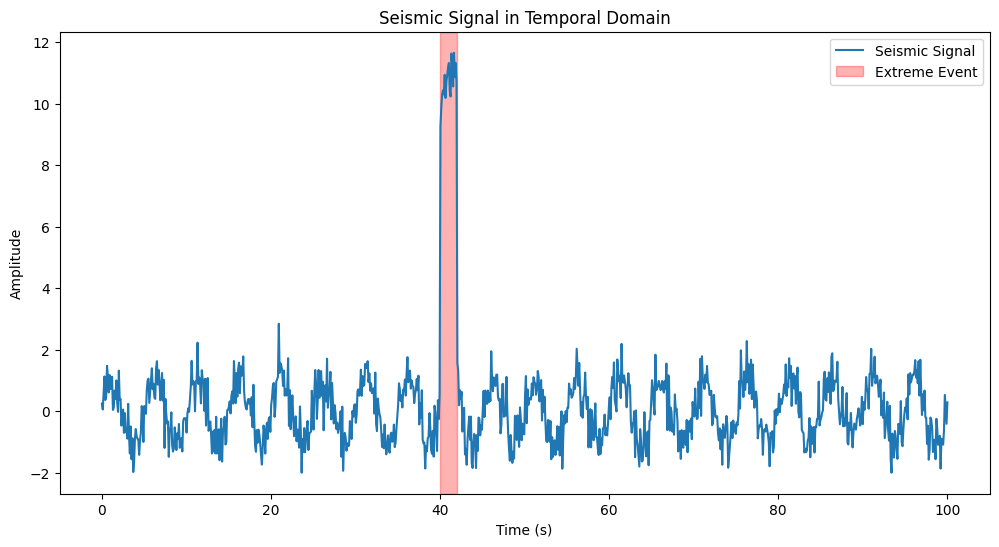

Extreme Events Detected:
          Time  Seismic_Signal   Z_Score
400  40.040040        9.253081  5.195766
401  40.140140        9.875509  5.553373
402  40.240240       10.299952  5.797231
403  40.340340       10.438255  5.876691
404  40.440440       10.300613  5.797610
405  40.540541       10.939645  6.164757
406  40.640641       10.187057  5.732369
407  40.740741       10.730933  6.044845
408  40.840841       10.930852  6.159705
409  40.940941       11.182745  6.304427
410  41.041041       11.321529  6.384164
411  41.141141       10.428337  5.870993
412  41.241241       10.232882  5.758697
413  41.341341       11.632258  6.562688
414  41.441441       11.137359  6.278351
415  41.541542       10.559393  5.946289
416  41.641642       11.656894  6.576843
417  41.741742       10.872910  6.126416
418  41.841842       11.325597  6.386500
419  41.941942       10.678953  6.014980


In [6]:
# Plot time-series data
plt.figure(figsize=(12, 6))
plt.plot(data['Time'], data['Seismic_Signal'], label="Seismic Signal")
plt.axvspan(40, 42, color='red', alpha=0.3, label="Extreme Event")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Seismic Signal in Temporal Domain")
plt.legend()
plt.show()

# Detect extreme events using Z-Score
data['Z_Score'] = zscore(data['Seismic_Signal'])
threshold = 3  # Threshold for extreme events
extreme_points = data[np.abs(data['Z_Score']) > threshold]
print("Extreme Events Detected:")
print(extreme_points)

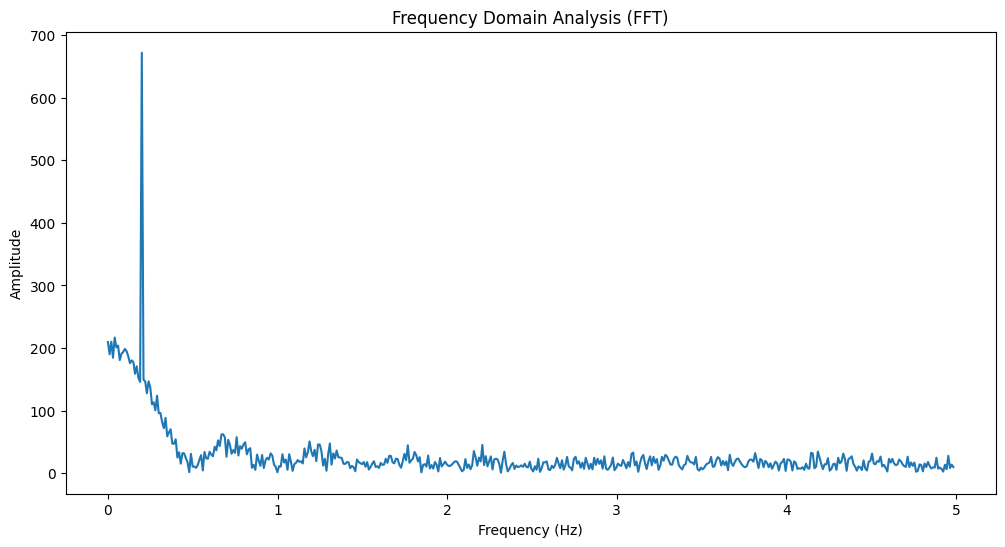

In [9]:
# Fourier Transform to analyze frequency components
fft_values = fft(data['Seismic_Signal'].to_numpy()) # Convert to NumPy array
frequencies = np.fft.fftfreq(len(fft_values), d=(time[1] - time[0]))

# Plot frequency domain (Fourier Transform)
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values)[:len(fft_values)//2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Frequency Domain Analysis (FFT)")
plt.show()

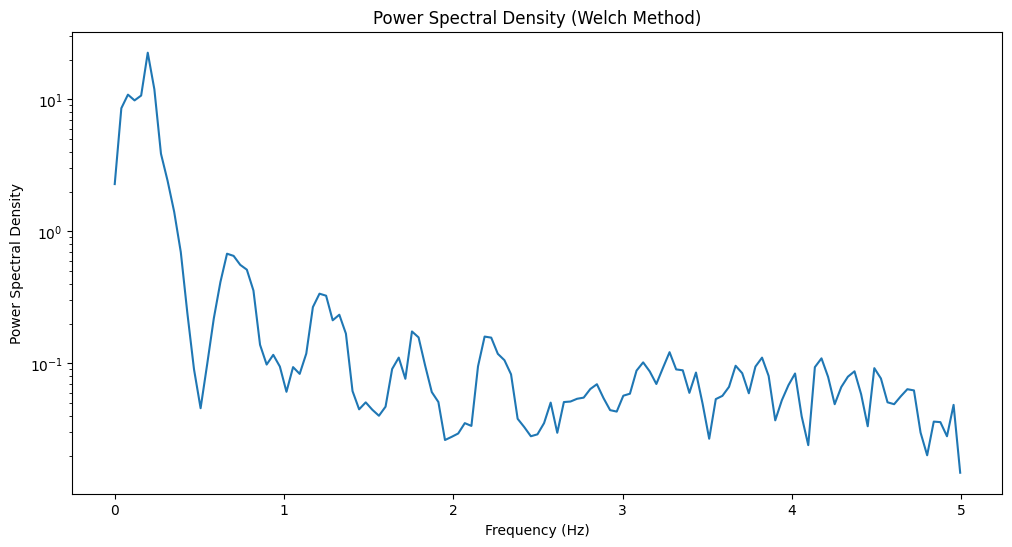

In [10]:
# Power Spectral Density (Welch Method)
frequencies_psd, psd = welch(data['Seismic_Signal'], fs=1/(time[1] - time[0]), nperseg=256)

plt.figure(figsize=(12, 6))
plt.semilogy(frequencies_psd, psd)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.title("Power Spectral Density (Welch Method)")
plt.show()